# DataSet Overview

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

| Variable | Description |
| --- | --- |
| Item_Identifier | Unique product ID |
| Item_Weight | Weight of product|
| Item_Fat_Content | Whether the product is low fat or not|
| Item_Visibility | The % of total display area of all products in a store allocated to the particular product|
| Item_Type | The category to which the product belongs|
| Item_MRP | Maximum Retail Price (list price) of the product|
| Outlet_Identifier | Unique store ID|
| Outlet_Establishment_Year | The year in which store was established|
| Outlet_Size | The size of the store in terms of ground area covered|
| Outlet_Location_Type| The type of city in which the store is located|
| Outlet_Type | Whether the outlet is just a grocery store or some sort of supermarket |
| Item_Outlet_Sales | Sales of the product in the particulat store. This is the outcome variable to be predicted.|

# Import modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Load Dataset 

In [3]:
data = pd.read_csv('Train.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Statistical informations

In [4]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Data type attributes

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Check unique values in the dataset

In [6]:
data.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# Dataset Processing

### Check for null values in the dataset

In [7]:
data.isnull().sum() # Item_Weight has 1463 null values and Outlet_Size has 2410

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Check for categorical attributes

In [8]:
categorical_columns = []
for x in data.dtypes.index:
    if data.dtypes[x] == 'object':
        categorical_columns.append(x)

In [9]:
categorical_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
categorical_columns.remove('Item_Identifier')
categorical_columns.remove('Outlet_Identifier')


In [11]:
categorical_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

### print categorical columns values

In [12]:
for x in categorical_columns:
    print(x)
    print(data[x].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

### Fill the missing values in the dataset

In [13]:
item_weight_mean = data.pivot_table(values = "Item_Weight", index = "Item_Identifier") # calculate the mean weight of each item identifier
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [14]:
# Get the rows that have weight missing in Item_Weight column
row_bool = data['Item_Weight'].isnull()
row_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [15]:
for i, item in enumerate(data['Item_Identifier']):
    if row_bool[i]:
        if item in item_weight_mean:
            data['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']  # if a certain row has null in Item_Weight and its identifier exist in item_weight_mean, affect the mean value of the corresponding identifier
        else:
            data['Item_Weight'][i] = np.mean(data['Item_Weight']) # else affect the mean of the total of Item_Weight values to that row

In [16]:
# check if there still null values in Item_Weight column
data['Item_Weight'].isnull().sum()

0

In [17]:
# calculate the outlet_size mode based on outlet_type because outlet_size is a categorical attribute
outlet_size_mode = data.pivot_table(values = "Outlet_Size", columns = "Outlet_Type", aggfunc = (lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [18]:
missing_outlet_size = data["Outlet_Size"].isnull()
missing_outlet_size

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [19]:
# filling the missing values in outlet_size 
data.loc[missing_outlet_size, "Outlet_Size"] = data.loc[missing_outlet_size, "Outlet_Type"].apply(lambda x: outlet_size_mode[x])

In [20]:
# check if Outlet_Size still has null values
data["Outlet_Size"].isnull().sum()

0

In [21]:
# The zero values in Item_visibility
sum(data["Item_Visibility"]==0)

526

In [22]:
# filling the zero values in Item_visibility with the mean of The all values
data.loc[:, "Item_Visibility"].replace(0, data["Item_Visibility"].mean(), inplace = True)

In [23]:
# Check for zero values in Item_visibility
sum(data["Item_Visibility"]==0)

0

#### Agregate Low fat, LF and low fat into one value : Low Fat and Regular, reg into Regular

In [24]:
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

In [25]:
data["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Creation of New Attributes

### Extract the Type of the Item from Item_Identifier e.g: FDA15 ==> FOOD, DRC01 ==> Drink

In [26]:
#Extract the first two letters
data["New_Item_Type"] = data["Item_Identifier"].apply(lambda x: x[:2])

In [27]:
data["New_Item_Type"]

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [28]:
# Replace the first two letters to a meaninful name
data["New_Item_Type"] = data["New_Item_Type"].map({'FD': 'Food', 'DR': 'Drinks', 'NC': 'Non-Consumable'})

In [29]:
data["New_Item_Type"].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

### Add a new value in Item_Fat_Content based on the value of the Item in the column "New_Item_Type"

In [30]:
data.loc[data["New_Item_Type"] == 'Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'

In [31]:
data['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

## Feature Scaling

In [32]:
# create a new column to standardize the Outlet_Establishment_Year // 2013 is the year of dataset collection
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']

In [33]:
data['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [34]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


# Exploratory Data Analysis

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

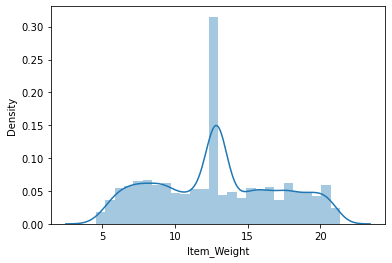

In [35]:
# Item_Weight's Plot
sns.distplot(data['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

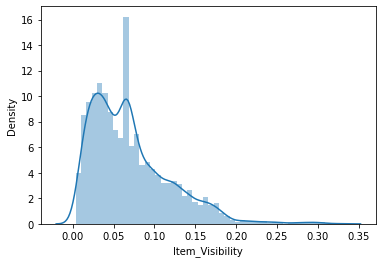

In [107]:
# Item_Visibility's Plot
sns.distplot(data['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

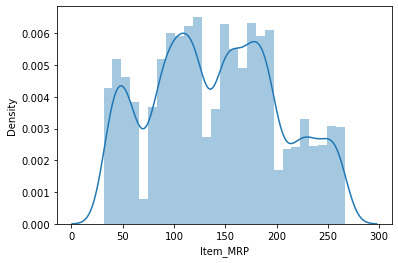

In [108]:
# Item_MRP's Plot #Maximum Retail Price
sns.distplot(data['Item_MRP']) 

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

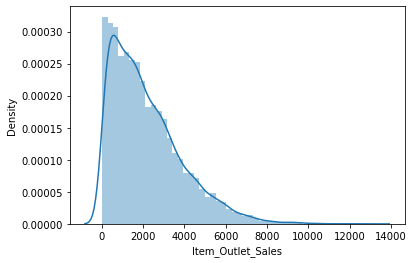

In [109]:
# Item_Outlet_Sales's Plot
sns.distplot(data['Item_Outlet_Sales'])


#### we can see the the values of Item_Outlet_Sales are too big so we need to make a normalization, we are going to use log transformation

In [110]:
data['Item_Outlet_Sales'] = np.log(1 + data['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

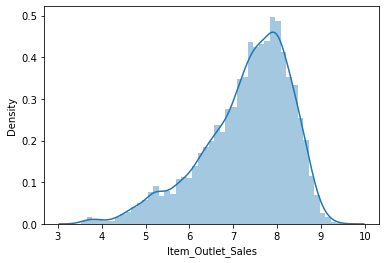

In [111]:
# Item_Outlet_Sales's Plot after normalization using log normalization
sns.distplot(data['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

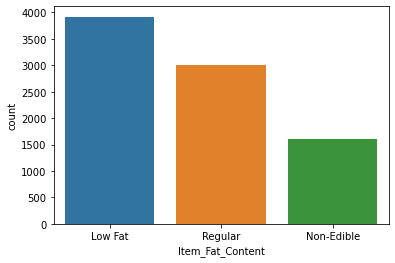

In [112]:
# Item_Fat_Content's Plot
sns.countplot(data['Item_Fat_Content'])

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

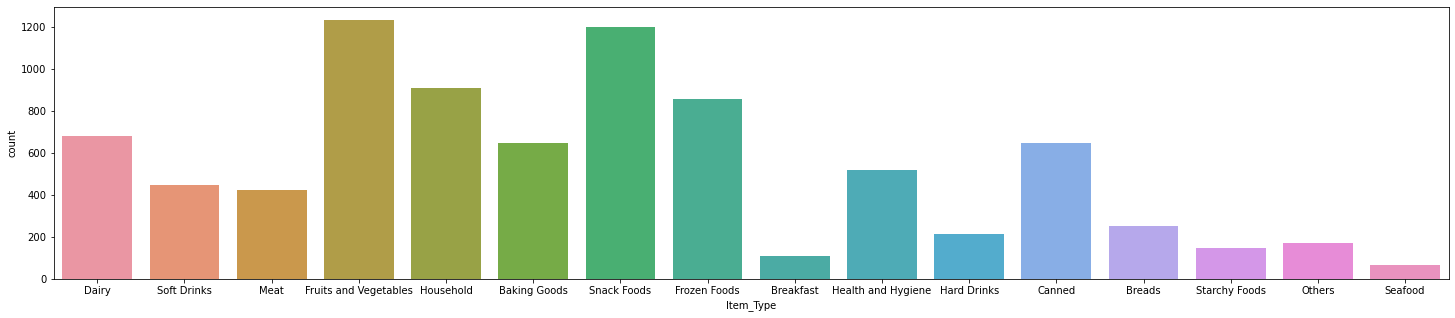

In [119]:
# Item_Type's Plot
plt.figure(figsize = (25,5))
sns.countplot(data['Item_Type'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

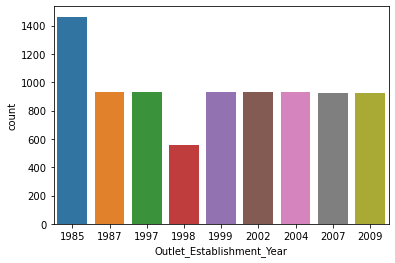

In [120]:
# Outlet_Establishment_Year's Plot
sns.countplot(data['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

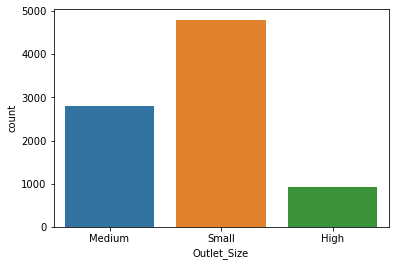

In [122]:
# Outlet_Size's Plot
sns.countplot(data['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

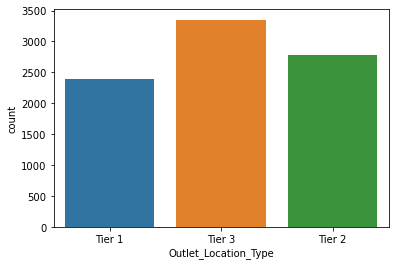

In [123]:
#Outlet_Location_Type's Plot
sns.countplot(data['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

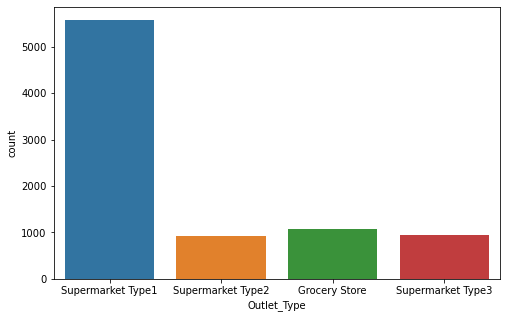

In [127]:
#Outlet_Type's Plot
plt.figure(figsize = (8,5))
sns.countplot(data['Outlet_Type'])

# Correlation Matrix

In [36]:
corr = data.corr() # calculate the correlation matrix using the corr function

<AxesSubplot:>

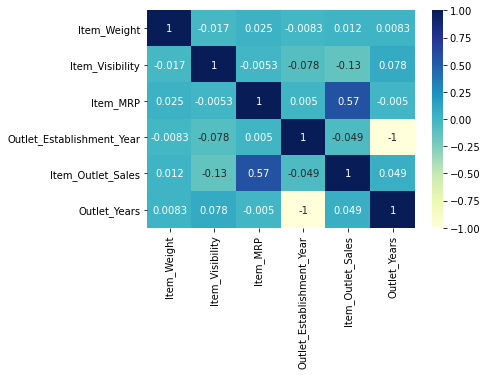

In [37]:
sns.heatmap(corr, annot = True, cmap = 'YlGnBu') #display the correlation matrix

#### We can see that the Item_MRP has an impact on Item_Outlet_Sales which we aim to predict in this Project


# Label Encoding

In [38]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data["Outlet"] = LE.fit_transform(data["Outlet_Identifier"])